In [28]:
import pandas as pd

df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# drop "name" column from data
df = df.drop(["name"], axis = 1)
# 0 means there is 1 previous owner(new car); 1 is more than 1 previous owner
df['owner'] = df['owner'].apply(lambda x: 0 if x == "First Owner" else 1).astype(int) 
# Simplify fuel types into 3 categories. Any fuel type that isn't petrol/diesel make up <10% of the dataset and should be lumped as other instead
df['fuel'] = df['fuel'].apply(lambda x:'Petrol' if x == 'Petrol' else ('Diesel' if x == 'Diesel' else 'Other'))
# Make dummy variables for categorical variables so we can model with the data
df = pd.get_dummies(df, columns = ['fuel','seller_type','transmission']) 
# Transform year column into a variable representing a car's age
df['year'] = 2023 - df['year'] 
# Rename Column name year to age
df = df.rename(columns = {"year" : "age"})
for i in ['age','selling_price','km_driven']: #Standardize and scale these columns
    df[i] = (df[i]-df[i].mean())/df[i].std()
    
print("Processed Dataset:")
display(df.head(5))

Processed Dataset:


,age,selling_price,km_driven,owner,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,1.444908,-0.767658,0.081130,0,False,False,True,False,True,False,False,True
1,1.444908,-0.638023,-0.347649,0,False,False,True,False,True,False,False,True
2,0.258765,0.165712,0.724298,0,True,False,False,False,True,False,False,True
3,-0.927378,-0.439250,-0.433405,0,False,False,True,False,True,False,False,True
4,-0.215692,-0.093557,1.603294,1,True,False,False,False,True,False,False,True


In [29]:
# check for balance in "owner" column
print((df["owner"] == 0).sum())
print((df["owner"] == 1).sum())

2832
1508


In [30]:
X = df.drop("owner", axis = 1)
y = df["owner"]

print("X:")
display(X.head(5))
print("y:")
display(y.head(5))

X:


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,1.444908,-0.767658,0.081130,False,False,True,False,True,False,False,True
1,1.444908,-0.638023,-0.347649,False,False,True,False,True,False,False,True
2,0.258765,0.165712,0.724298,True,False,False,False,True,False,False,True
3,-0.927378,-0.439250,-0.433405,False,False,True,False,True,False,False,True
4,-0.215692,-0.093557,1.603294,True,False,False,False,True,False,False,True


y:


0    0
1    0
2    0
3    0
4    1
Name: owner, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split

# Splitting data into ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
display(X_train.head(5))
print("X_test:")
display(X_test.head(5))
print("y_train:")
display(y_train.head(5))
print("y_train:")
display(y_test.head(5))

X_train:


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
227,-0.927378,1.721329,-0.990817,True,False,False,False,True,False,False,True
964,-1.164606,-0.007134,-0.347649,True,False,False,False,True,False,False,True
2045,0.021536,-0.710964,-0.883622,False,False,True,False,True,False,False,True
1025,0.495994,-0.707161,0.081130,True,False,False,False,True,False,False,True
4242,-0.927378,0.312632,0.124008,True,False,False,True,False,False,False,True


X_test:


,age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
3978,0.733222,-0.586169,0.295519,True,False,False,False,True,False,False,True
1448,-1.401835,-0.439250,-0.840745,False,False,True,False,True,False,False,True
2664,1.207679,-0.663950,-0.525099,False,False,True,False,True,False,False,True
17,-0.215692,-0.093557,1.603294,True,False,False,False,True,False,False,True
1634,-0.690149,0.390413,-0.133260,True,False,False,False,True,False,True,False


y_train:


227     0
964     0
2045    1
1025    0
4242    0
Name: owner, dtype: int32

y_train:


3978    0
1448    0
2664    1
17      1
1634    1
Name: owner, dtype: int32

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "activation" : ["logistic", "tanh", "relu"],
    "max_iter" : [500, 750, 1000],
    "alpha" : [0.025, 0.075, 0.05],
}

mlp = MLPClassifier()

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_train, y_train)

print("Optimal Hyperparameters: ", grid.best_params_)
print("Optimal Accuracy: ", grid.best_score_)

Optimal Hyperparameters:  {'activation': 'relu', 'alpha': 0.05, 'max_iter': 500}
Optimal Accuracy:  0.7548997574274874


In [32]:
from sklearn.neural_network import MLPClassifier

mlp_best = MLPClassifier(activation='relu', solver='adam', batch_size='auto', alpha = 0.05, hidden_layer_sizes = (100,), max_iter = 500)

mlp_best.fit(X_train, y_train)

MLPClassifier(alpha=0.05, max_iter=500)

In [33]:
from sklearn.metrics import accuracy_score

y_pred = mlp_best.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.77


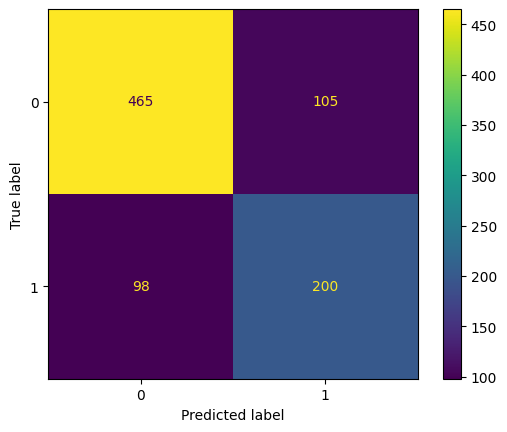

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = mlp_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=mlp_best.classes_)
disp.plot()
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       570
           1       0.66      0.67      0.66       298

    accuracy                           0.77       868
   macro avg       0.74      0.74      0.74       868
weighted avg       0.77      0.77      0.77       868



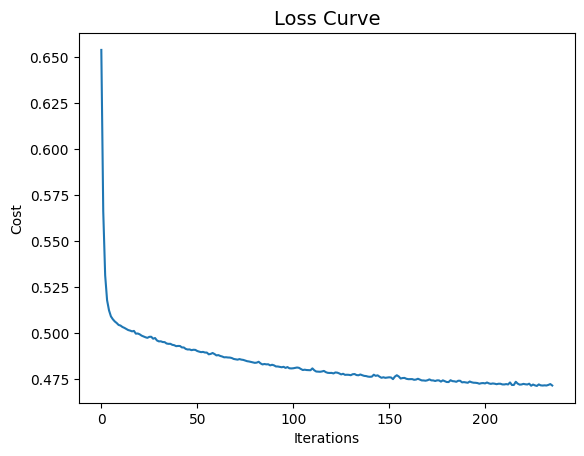

In [36]:
plt.plot(mlp_best.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [37]:
import pickle
pickle.dump(mlp_best, open("models/Classification_MLP.pkl", "wb"))

In [38]:
import numpy as np

print("X Min:")
print(np.min(X, axis=0))
print("\nX Max:")
print(np.max(X, axis=0))

X Min:
age                            -1.639064
selling_price                  -0.836796
km_driven                      -1.419574
fuel_Diesel                        False
fuel_Other                         False
fuel_Petrol                        False
seller_type_Dealer                 False
seller_type_Individual             False
seller_type_Trustmark Dealer       False
transmission_Automatic             False
transmission_Manual                False
dtype: object

X Max:
age                              5.003336
selling_price                   14.511954
km_driven                        15.87303
fuel_Diesel                          True
fuel_Other                           True
fuel_Petrol                          True
seller_type_Dealer                   True
seller_type_Individual               True
seller_type_Trustmark Dealer         True
transmission_Automatic               True
transmission_Manual                  True
dtype: object


In [39]:
print("y Min:")
print(np.min(y, axis=0))
print("\ny Max:")
print(np.max(y, axis=0))

y Min:
0

y Max:
1
